First we are importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import boxcox
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

Now downloading the Base Ball data by opening its Raw from the github link and making Data Frame by using Pandas

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.shape

(30, 17)

Above Data is having 30 Rows and 17 Columns

As we have to predict the number of wins ("W"), which will be our Label or Target dependent Variable, so we are shifting it to the last column

In [5]:
label=df.pop('W')

In [6]:
df.insert(16, 'W', label)

In [7]:
df

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [8]:
df.isnull().sum()

R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
W      0
dtype: int64

By using isnull function, we found that there is no Null (Missing) value in the dataset.

In [9]:
df.dtypes

R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
W        int64
dtype: object

The data type of almost all the variables are Integer except the Earned Run Average (ERA) which of Float data type

In [10]:
df.describe()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


By the above non graphical analysis, we found that 
(1) The Mean & Median values are almost closer to each other for all the features, so high skewness are not there.
(2) The Standard Deviations are high of almost all the features, so it is a spreaded dataset.
(3) The difference between 25% Percentile & Minimum value and 75% Percentile & Maximum Value are not very high, so not so much Outliers are there of almost all the features in both sides of the Qurantile ranges.

We can have more observations by using Graphical Analysis here

R         AxesSubplot(0.125,0.712609;0.133621x0.167391)
AB     AxesSubplot(0.285345,0.712609;0.133621x0.167391)
H       AxesSubplot(0.44569,0.712609;0.133621x0.167391)
2B     AxesSubplot(0.606034,0.712609;0.133621x0.167391)
3B     AxesSubplot(0.766379,0.712609;0.133621x0.167391)
HR        AxesSubplot(0.125,0.511739;0.133621x0.167391)
BB     AxesSubplot(0.285345,0.511739;0.133621x0.167391)
SO      AxesSubplot(0.44569,0.511739;0.133621x0.167391)
SB     AxesSubplot(0.606034,0.511739;0.133621x0.167391)
RA     AxesSubplot(0.766379,0.511739;0.133621x0.167391)
ER         AxesSubplot(0.125,0.31087;0.133621x0.167391)
ERA     AxesSubplot(0.285345,0.31087;0.133621x0.167391)
CG       AxesSubplot(0.44569,0.31087;0.133621x0.167391)
SHO     AxesSubplot(0.606034,0.31087;0.133621x0.167391)
SV      AxesSubplot(0.766379,0.31087;0.133621x0.167391)
E             AxesSubplot(0.125,0.11;0.133621x0.167391)
W          AxesSubplot(0.285345,0.11;0.133621x0.167391)
dtype: object

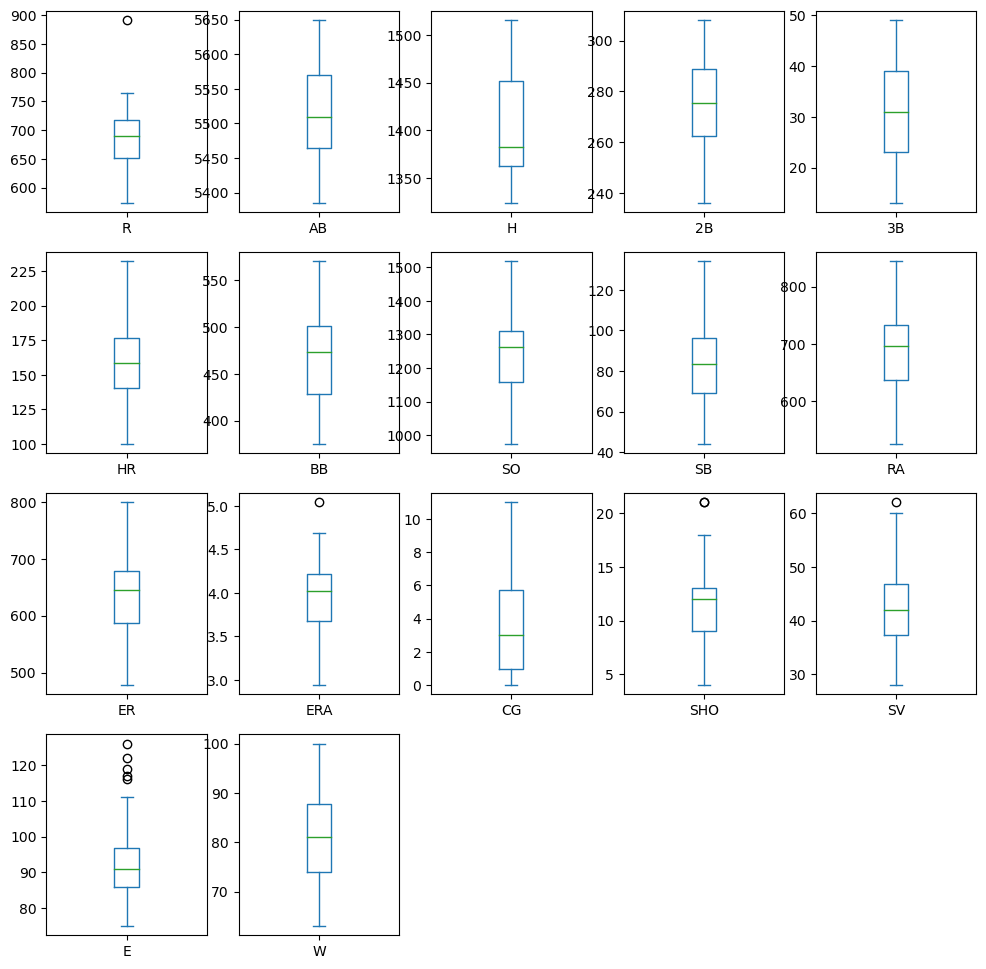

In [11]:
df.plot(kind='box',figsize=(12,12),layout=(4,5),subplots=True)

By using the above Box Plot display, it has been observed that the feature "E" ("Error") is having a little more Outliers above the Maximum Qurantile range 75% (96.75) and Maximum value (126).

Now we will check the corelation between the features by non graphical & graphical analysis

In [12]:
dfcor=df.corr()

In [13]:
dfcor

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
R,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.430751
AB,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.087947
H,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,0.037612
2B,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.427797
3B,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.251118
HR,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.307407
BB,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.484342
SO,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.111850
SB,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.157234
RA,-0.041623,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.016659,-0.636862,-0.616224,0.198996,-0.812952


<AxesSubplot:>

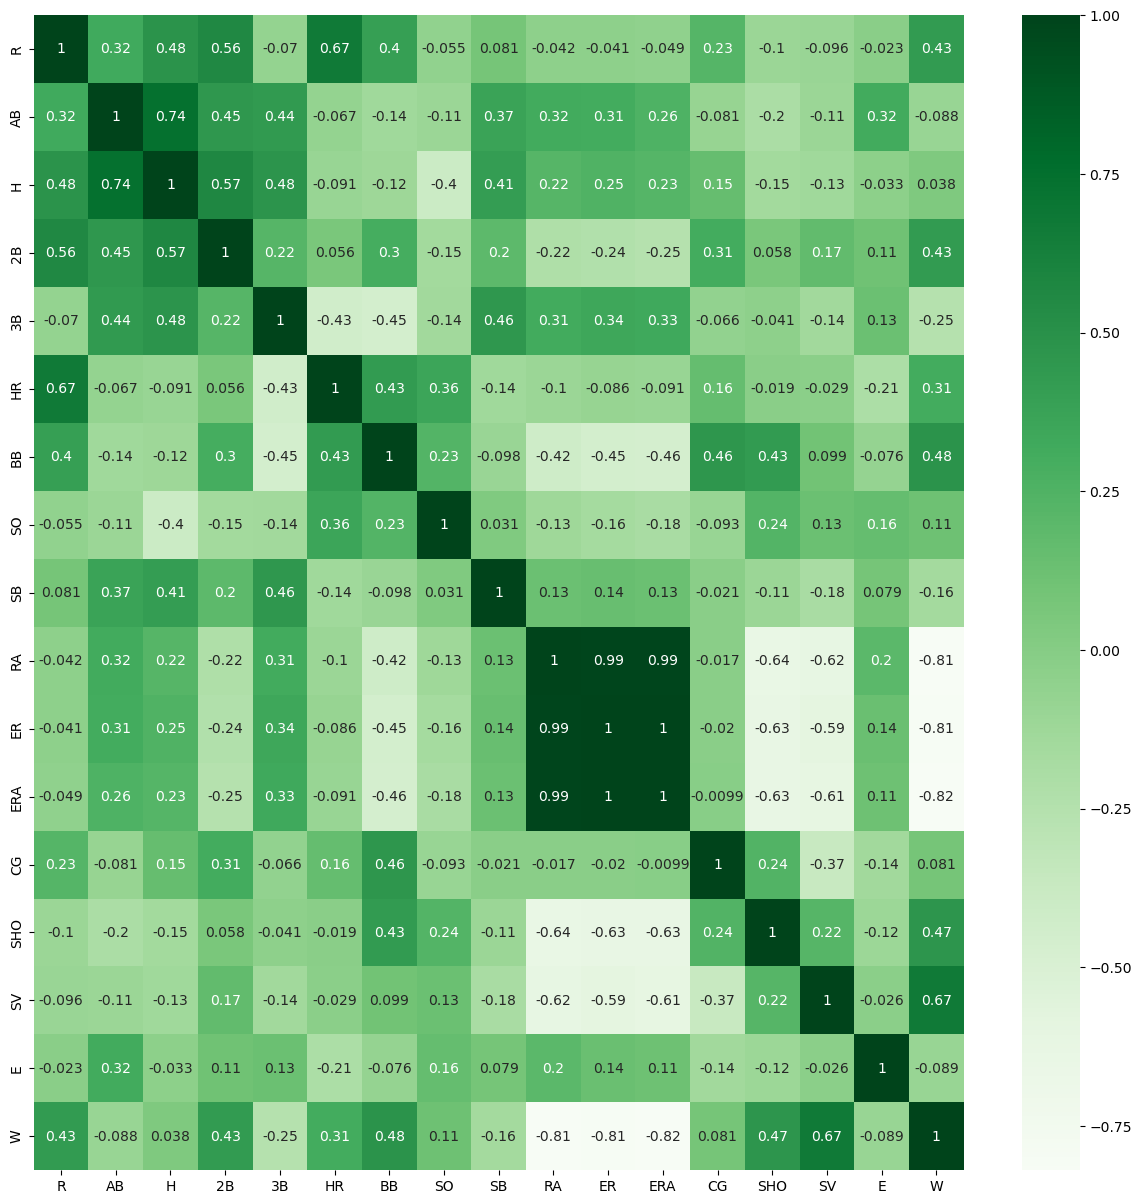

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(dfcor,annot=True,cmap='Greens')

We observed that 
(1) There are very strong positive corelation between "RA" (Run Average), "ER" (Earned Run) & "ERA" (Earned Run Average).
(2) All the Features are having low or strong corelation with the target variable "W" (Wins) either positively or negatively.
(3) The Feature "AB" (Time at Bat) & "H" (Base Hit) are having very low corelation with "W" (Wins), "AB" is negatively & "H" is positively.

<AxesSubplot:xlabel='W', ylabel='AB'>

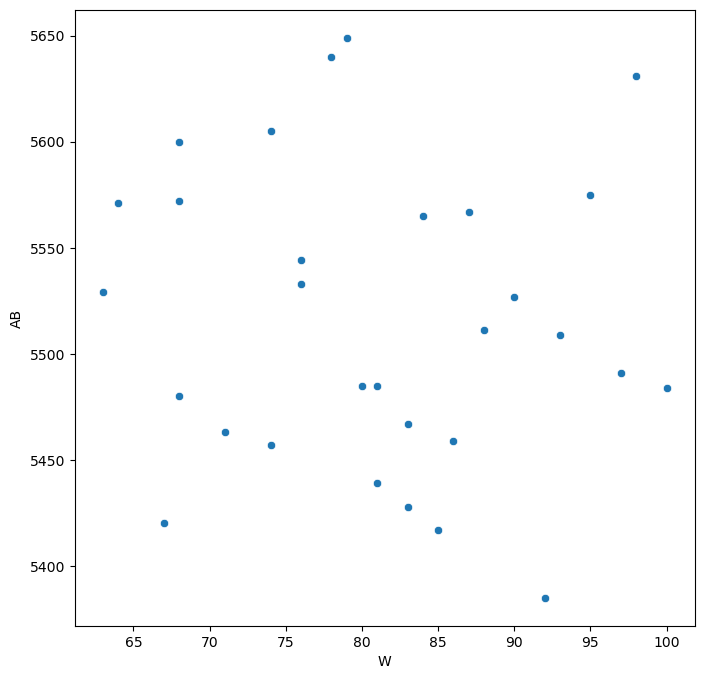

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(df['W'],df['AB'])

<AxesSubplot:xlabel='W', ylabel='H'>

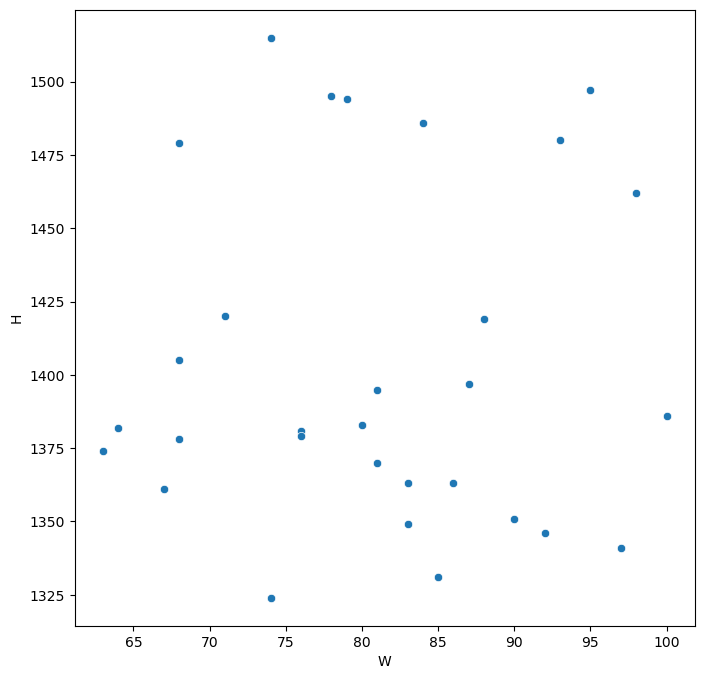

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(df['W'],df['H'])

By using above 2 Scatter Plots also, we found that Features "AB" & "H" are not contributing so much to the Target Variable "W" and by droping thest 2 Features will not effect our Machine Learning Model's prediction. So we are going to drop these 2 Independent Variables.

In [17]:
df.drop(['AB'],axis=1,inplace=True)

In [18]:
df.drop(['H'],axis=1,inplace=True)

In [19]:
df

,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [20]:
df.shape

(30, 15)

Now the shape of our Data Frame is 30 Rows and 15 Columns

In [21]:
df.skew()

R      1.200786
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
W      0.047089
dtype: float64

By using above Skewness checking method, we got that the Feature "R" (Runs Scored) is having Skewness value above 1.20, we can check the same by the below Graphical representations also.

<AxesSubplot:xlabel='R', ylabel='Density'>

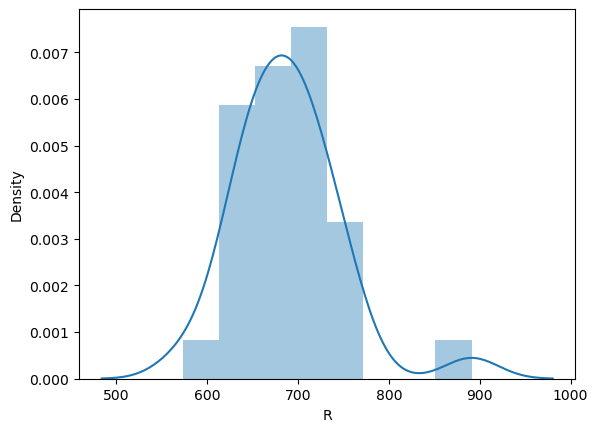

In [22]:
sns.distplot(df['R'])

<AxesSubplot:xlabel='R'>

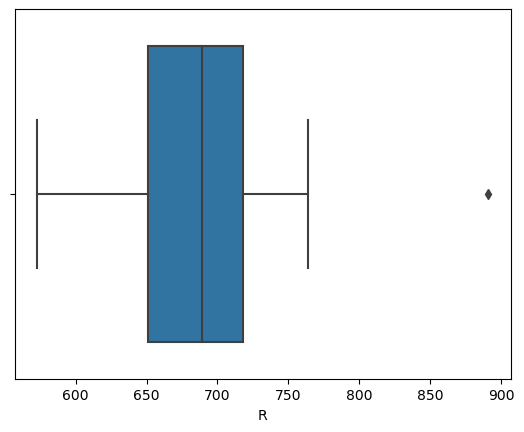

In [23]:
sns.boxplot(df['R'])

As per above Distplot & Boxplot also, it is showing that a Data Point is lying away from the maximum quarantile range. So we are using boxcox method to overcome of this Feature's skewness.

In [24]:
df['R']=boxcox(df['R'],0)

As the Feature "R" is positively skewed, we have used the boxcox log method (i.e. 0 Method) for its logarithm Transformation for ditributing this Feature's date approximately Normal. 

<AxesSubplot:xlabel='R', ylabel='Density'>

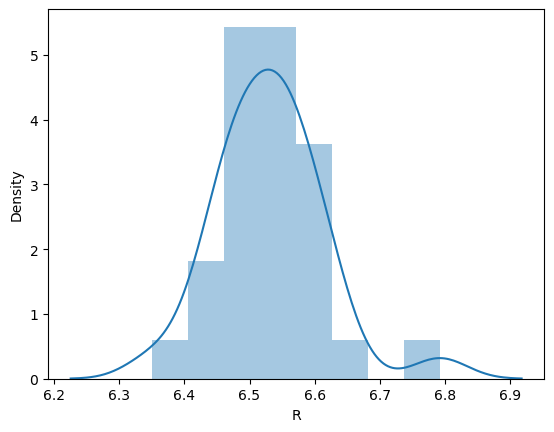

In [25]:
sns.distplot(df['R'])

In [26]:
df.skew()

R      0.744196
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
W      0.047089
dtype: float64

Now all the Features skewness values are between -1 to +1, which are fine as per our opinion.

We will use now the zscore method to get the zscore value and to eliminate the outliers lying beyond the zscore value 3 both sides of the dataset and for this we will use the absolute method (abs method) to convert the left side's negative zscore values also as positive value to remove outliers more eassily.

In [27]:
z=np.abs(zscore(df))
z

,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,0.665385,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470,1.365409
1,0.179624,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197,0.197838
2,0.307662,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242,0.003243
3,1.204801,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758,0.483244
4,0.055130,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197,0.677839
5,3.221588,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470,1.170814
6,1.327690,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152,0.587028
7,0.476828,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970,0.003243
8,0.776717,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576,0.094054
9,1.067026,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303,0.288649


In [28]:
cleaned_df=df[(z<3).all(axis=1)]
cleaned_df

,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,6.584791,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,6.545350,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,6.505784,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,6.432940,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,6.535241,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
6,6.638568,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,6.569481,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,6.467699,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,6.617403,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78
10,6.621406,279,32,172,503,1233,101,733,680,4.24,5,9,45,119,88


In [29]:
df.shape

(30, 15)

In [30]:
cleaned_df.shape

(29, 15)

After cleaning the Dataset, only 3% of the data has been lost (i.e. only 1 Row has been lost) and now our cleaned dataset shape is 29 Rows & 15 Columns. So now we may proceed for making our further Machine Learning Model.

First we will saperate and save our Independent Features & Target Features in different Variables 

In [31]:
x=cleaned_df.iloc[:,0:-1]

In [32]:
y=cleaned_df.iloc[:,-1]

In [33]:
x.shape

(29, 14)

In [34]:
y.shape

(29,)

Now we will try to train our model by using differenct linear regression algorithms with different random states using "for" loop. As our Target variable "W" (Number of Wins) is the continueous data (i.e. Linear type data).

In [35]:
lr=LinearRegression()

In [36]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(xtrain,ytrain)
    pred=lr.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

0.2815361889234248
0.3214167810762453
0.25680089217383206
0.4527874207162069
0.20673813422796483
0.18963613879538865
0.5988316115348862
0.7331978278792046
0.7760916048539175
0.5987918751639298
0.06274688536297568
0.4875244519166545
0.7934701268548532
0.7000474215204902
0.3421407462580942
0.8285625044581931
-0.265066844699293
0.7479245839966697
0.14499917629824788
0.5531568728290366
0.10748099725164206
0.5517113961461921
0.6265577227827548
0.7963408489857209
-0.2193852151873208
-2.025546033484805
0.5414145271711192
0.7666381619469772
0.5785929921117727
-0.59924804657036
0.7700075489630434
0.23273693048987287
0.42275780542198016
0.8687024846214639
0.7045725547684976
0.8330356168306949
0.7131558199521845
0.3073993155840792
-0.8123547435264578
0.464862854471528
0.2119011254918366
0.6072988338224207
0.8306805681282055
0.5436256135229882
0.7286446849672132
0.14846038187084665
0.6090541673840143
0.6706180222466153
-0.4037011279802658
0.6365832887264959


In [37]:
sv=SVR()

In [38]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    sv.fit(xtrain,ytrain)
    pred=sv.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

-0.05248340786144068
0.020510744899318256
-2.076399023469936
-0.03114439444714301
-0.09139406091254765
0.014254086701692148
0.013130585663822525
0.02061742251448151
0.021548503581651612
-0.021121084100587773
-0.027426954007357063
-0.12107668509757064
-0.0736669744011742
0.023941338210481167
-0.5097355971884949
0.014885089589610323
-0.47609803758221614
0.018040272791713385
-0.06578827511444785
-0.31221954340517755
-0.4106920573224617
-0.2822475204271164
-0.6657962599767482
0.020751742571627374
-0.18844546688588237
-2.169328962669231
-0.11299000018210137
0.0009939537217369399
0.020033642555155495
-0.01459889898348421
-0.12096525266790548
-0.7967801633980318
-0.00046311066756388186
0.016591167907287208
-0.7091300648274435
-0.07162650529255976
-0.2769825680527871
0.008953543875791059
-0.8749045276998648
0.027531598978721372
-0.1598361077275412
-0.052632147535667695
0.0009242373022892991
-0.06857888280194468
0.02946990036524655
0.0018577948302737068
-0.006901329466660666
-0.0742584454754748

In [39]:
dt=DecisionTreeRegressor()

In [40]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    dt.fit(xtrain,ytrain)
    pred=dt.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

-0.5954041854739431
0.7071547420965059
-2.330827067669173
0.5813559322033899
-0.25377436178973367
-1.0
0.5335836909871243
-0.3590534979423867
-0.09107358262967424
0.13580246913580252
0.24961928934010147
-0.9598445595854923
0.08290315919884361
-1.7415917843388957
0.511002444987775
-0.2082259845417742
-0.42953995157384983
-0.014579759862778818
-1.4675522648083623
0.347394540942928
0.15752757949383522
-0.36483217417599034
0.20808383233532934
0.5032325844512688
0.07763975155279512
-0.27843322321849917
0.5144583513163574
-0.09603340292275564
0.19155600100225523
-0.1552775441547518
0.6891209547854027
-0.6814345991561181
0.5437293729372937
0.5338852522140931
-0.9596992481203006
-0.06947938842655299
0.1577740725302209
-0.3882591093117409
-0.8161764705882353
0.5932821856287425
0.12435047482530004
0.28080158337456695
-0.06889168765743081
0.008523641042135766
0.3340040241448693
0.2288387288387288
-0.7970479704797049
0.42586490939044486
0.2901453385324353
-0.6217008797653956


In [41]:
br=BayesianRidge()

In [42]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    br.fit(xtrain,ytrain)
    pred=br.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

0.39395296261529966
0.7091780728747714
-0.020989148264382917
0.3884192174428702
0.7507795660777914
0.29896000885530916
0.494721035546135
0.5413756685909008
0.6135517138714117
0.5296028752023709
0.4081687453846392
0.5534079996789139
0.6356541103660082
0.7399412967990512
0.5715020867959545
0.7373524097029325
0.4292291569266077
0.4493489970749326
-0.2760824678243463
0.5497611545214036
0.033068188273679966
0.4137613453856702
0.5821004486558585
0.7671990407034441
0.4279160183260543
-0.2793474827044182
0.42958425235383135
0.6249310384027649
0.4261553208538339
0.5356040818097261
0.4359349413539394
-0.7861951820332165
0.5113998198835388
0.6801135016648745
0.552486935338573
0.7680466466799227
0.4297450221740746
0.06737032276994426
-0.7801644682118334
0.7182477831999214
0.46687252419030845
0.7884889359939585
0.4351471466850211
0.5404125968909164
0.8566842907035858
0.5233389860394071
0.13388791753662144
0.28556108428563987
0.42738385548298796
-0.7478498354282042


In [43]:
gb=GradientBoostingRegressor()

In [44]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    gb.fit(xtrain,ytrain)
    pred=gb.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

0.0710056942288475
0.7622843165486964
-0.6257029391032236
0.7004127654333985
0.7755718365955684
0.5628792780078936
0.4698556126865875
0.5146230724744569
0.6464913138670849
0.42287670763890217
0.4998278277465591
-0.1977576783832098
0.1757764560357601
0.1459293834001968
0.22959547169620875
0.43421531815229564
-0.15105964014622897
0.5097578894363735
-0.4822138956086863
0.4670848814228099
0.4609756603578259
-0.08843704404748043
-0.21817630948262545
0.8355268406817089
0.5263021733904627
-0.07954980965721403
0.2802131216016124
-0.16177407799726762
0.5297474621580438
0.15482029912610773
0.594723175620135
-0.08264989450650218
0.5306120466959258
0.7027464551272247
-0.4839776764627397
0.645710073963986
0.4815428125453739
-0.010038607225787866
0.12901985283957584
0.5691871535209913
0.21383366299541406
0.4802805073268529
-0.0031212293558622317
0.13906013130117334
0.7206264603635704
0.20192615784793333
0.08584346881343352
0.5735777812404468
0.36579358831626263
-0.39742597703003746


In [45]:
kn=KNeighborsRegressor()

In [46]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    kn.fit(xtrain,ytrain)
    pred=kn.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

0.2665572425112843
0.4959733777038269
-0.8528571428571428
0.35705084745762716
0.5159319242382648
0.6728571428571428
0.2266952789699569
0.28942386831275724
0.3885335171463037
0.4526913580246913
0.3603147208121824
0.09310880829015544
0.2659508569068759
0.7195789473684211
0.04508557457212725
0.5562605815237396
0.26779661016949086
0.3403087478559176
-0.565435540069686
0.25617866004962786
0.25990914990266034
0.2565951013002723
-0.04520958083832305
0.3911653466946824
0.2478012422360253
-0.9538367154318075
0.13775571860163982
0.5632985386221295
0.5437534452518168
0.4378595458368376
0.27351388570117074
-0.8857383966244721
0.19825082508250857
0.4683519445514054
-0.08774135338345856
0.43868008515579693
0.2779741558982908
-0.52693927125506
-0.5449999999999999
0.5534019461077844
0.3177674251926176
0.48226620484908445
0.2241863979848867
0.49670633644258644
0.6092957746478876
0.23568161568161583
0.49247232472324753
0.14227347611202623
-0.001006735200283826
-0.4818181818181808


In [47]:
ad=AdaBoostRegressor()

In [48]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    ad.fit(xtrain,ytrain)
    pred=ad.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

0.6504411161263848
0.6924980474719005
-0.1083980785296581
0.7079566854990584
0.7845757449287702
0.6808665070966657
0.7028108084435492
0.563557384545039
0.6635134844046182
0.43282117817405874
0.5647829690251736
-0.023432642487046795
0.3645383406304913
0.5440308087291399
0.523276283618582
0.7164096054321618
0.03492063492063491
0.5492529064227178
0.04933362369337979
0.4924341796287056
0.3360439649578195
0.1722820774751701
0.4097534098469725
0.796710845320834
0.5943091250475347
-0.3686000627927568
0.510009204372297
0.29226832521456747
0.37291631866143293
0.5319738855645287
0.6596049460638056
-0.37453499113674416
0.4501530614081045
0.8059393049672698
0.009292857142856992
0.49449968994758753
0.509790277198833
0.157273630504833
0.31416909211601285
0.6342814371257484
0.2801637251388639
0.6057950890648194
0.06256856108312359
0.39253618526857514
0.6754490833892242
0.33598566973566946
0.3773812034038707
0.4359225700164746
0.3603350787049373
-0.2530991651575365


As by the above we have observed that the Linear Regression Algorithm is giving the best approximately 87% accurate prediction with 33 random state. So we are going to use this Algorithm with 70% of traing & 30% of testing dataset.

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=33)

In [50]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [51]:
lrpred=lr.predict(xtest)

In [52]:
r2_score(ytest,lrpred)

0.8687024846214639

In [53]:
mean_squared_error(ytest,lrpred)

16.83850110805226

In [54]:
mean_absolute_error(ytest,lrpred)

3.5350575441547485

So we have got approximately 87% accurate prediction with lr model, but the MSE & MAE are a little higher side, so we are going to use some other Regularization and Feature selection methods.

In [55]:
scl=StandardScaler()

In [56]:
xtrain=scl.fit_transform(xtrain)

In [57]:
xtest=scl.transform(xtest)

In [58]:
ls=Lasso(alpha=0.7)

In [59]:
ls.fit(xtrain,ytrain)

Lasso(alpha=0.7)

In [60]:
lspred=ls.predict(xtest)

In [61]:
r2_score(ytest,lspred)

0.8742561258946934

In [62]:
mean_squared_error(ytest,lspred)

16.126263755628706

In [63]:
mean_absolute_error(ytest,lspred)

2.797391915110394

By fitting the Standard Scaler and using the L1 Regularization (Lasso) method also we have got the same result.

In [64]:
cv=cross_val_score(lr,x,y,cv=KFold(n_splits=6))

In [65]:
cv.mean()

0.2073461674587593

In [66]:
cv

array([ 0.74832048, -2.14892359,  0.33126886,  0.90104795,  0.84170774,
        0.57065556])

Cross Validation of this data with 6 splits are also not giving good results.

In [67]:
rg=Ridge()

In [68]:
rg.fit(xtrain,ytrain)

Ridge()

In [69]:
rgpred=rg.predict(xtest)

In [70]:
r2_score(ytest,rgpred)

0.8341182184472802

In [71]:
mean_squared_error(ytest,rgpred)

21.27382650332905

In [72]:
mean_absolute_error(ytest,rgpred)

3.8584088345619247

We observed that even L1 (Lasso) is giving good results than L2 (Ridge) Regularization.

In [73]:
gs=GridSearchCV(estimator=lr,param_grid={"fit_intercept":[True],"normalize":[True],"copy_X":[True]},cv=3,n_jobs=-1)

In [74]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'normalize': [True]})

In [75]:
gs.score(xtest,ytest)

0.8687024846214195

Hyper Parameter Tuning is also giving above 70% accurate results only, so can use some more Feature Selection methods.

In [76]:
cleaned_df.shape

(29, 15)

In [77]:
xtrain.shape

(20, 14)

In [78]:
ytrain.shape

(20,)

In [79]:
xtest.shape

(9, 14)

In [80]:
ytest.shape

(9,)

In [81]:
kb=SelectKBest(score_func=f_regression, k=12)

In [82]:
x_train=kb.fit_transform(xtrain,ytrain)

In [83]:
x_test=kb.transform(xtest)

In [84]:
x_train.shape

(20, 12)

In [85]:
x_test.shape

(9, 12)

In [87]:
lr.fit(x_train,ytrain)

LinearRegression()

In [88]:
slr_pred=lr.predict(x_test)

In [89]:
r2_score(slr_pred, ytest)

0.9146632428038995

In [90]:
mean_squared_error(ytest,slr_pred)

13.70121110364023

In [91]:
mean_absolute_error(ytest,slr_pred)

3.2324975649337357

By selecting the best 12 features by using KBest select method and applying the same with lr model, we have succeeded to improve the Prediction Accuracy above 91% and to Reduce some MSE & MAE Errors.

Now we are going to save this lr ML Model

In [92]:
pickle.dump(lr, open('baseball_study', 'wb'))

In [93]:
model=pickle.load(open('baseball_study', 'rb'))

In [94]:
model_test=model.predict(x_test)

In [95]:
r2_score(ytest,model_test)

0.8931653735661476

In [96]:
mean_squared_error(ytest,model_test)

13.70121110364023

In [97]:
mean_absolute_error(ytest,model_test)

3.2324975649337357

As per our saved ML model, the MSE & MAE Errors are coming same as before saving the model, and the prediction accuracy is varing betweeen 89% to 91% as above